#**IRIS FLOWER CLASSIFICATION**

#Importing Libraries:

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import f1_score, recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Loading Dataset:

In [75]:
data = pd.read_csv('/content/drive/MyDrive/IRIS.csv')

In [76]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [78]:
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Preprocessing:

In [80]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [81]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

#Label Encoder:

In [82]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [83]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
data['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64>

#Identifying and Removing Null Values:

In [85]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [86]:
data.shape

(150, 5)

In [87]:
len(data['sepal_length'].unique())

35

In [88]:
len(data['sepal_width'].unique())

23

In [89]:
len(data['petal_length'].unique())

43

In [90]:
len(data['petal_width'].unique())

22

In [91]:
len(data['species'].unique())

3

#Data Splitting:

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#Building, Training and Evaluating the Model:

In [93]:
model = LogisticRegression(max_iter=1000)

In [94]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [95]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [96]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [97]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


#Among the above two mode we choose RandomForest as it has better accuracy

In [99]:
y_pred = model.predict(X_test)

#Data Visualization:

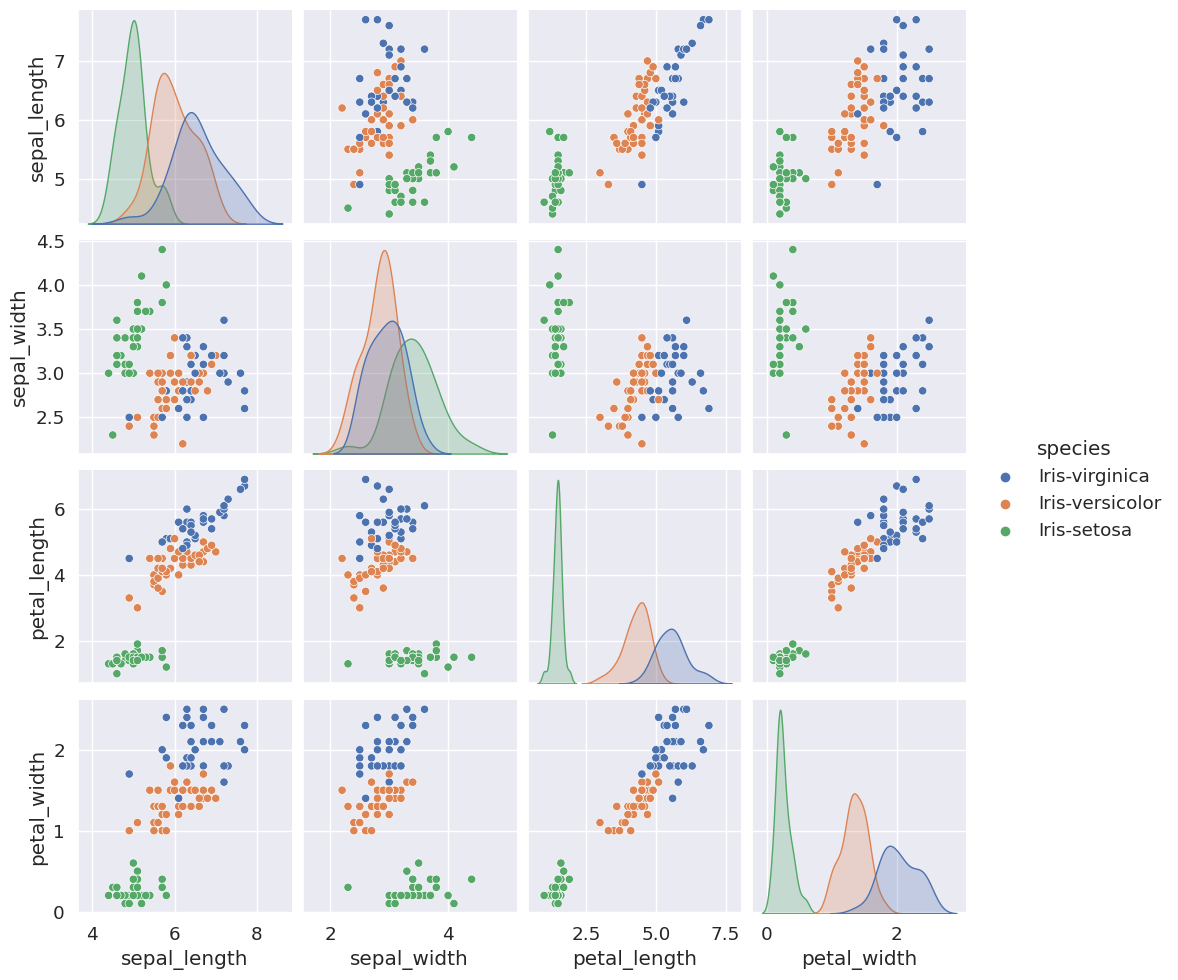

In [100]:
df = X_train.copy()
df['species'] = y_train
sns.pairplot(df, hue='species')
plt.show()

#Classification report:

In [101]:
target_names = ['setosa', 'versicolor', 'virginica']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# Evaluation Metrics:

In [102]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1 Score: {f1:.2f}')

Weighted F1 Score: 0.96


In [103]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 0.96


In [104]:
precision = precision_score(y_test,y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 0.96


In [105]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]


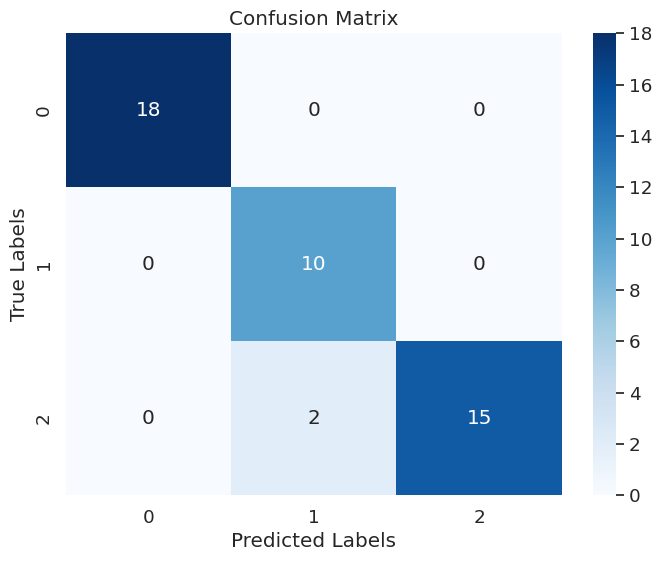

In [106]:
plt.figure(figsize=(8,6))
sns.set(font_scale = 1.2)
sns.heatmap(confusion, annot = True, fmt = 'd',cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#Making Predictions:

In [107]:
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.2, 4.8],
    'sepal_width': [3.5, 3.4, 3.1],
    'petal_length': [1.4, 5.4, 1.6],
    'petal_width': [0.2, 2.3, 0.2]
})

In [108]:
predictions = model.predict(new_data)

In [109]:
species_names = ['setosa', 'versicolor', 'virginica']

print("Predicted Species:")
print(predictions)

Predicted Species:
['Iris-setosa' 'Iris-virginica' 'Iris-setosa']
